# Model Interpretability 


What this notebook covers - 

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

The Best model is  "H2OGeneralizedLinearEstimator"

## About the Dataset

### AIM - To predict the total non-violent crimes per 100K population.

X (features):

Numerical Features:

1. **population**: Total population in the district.
2. **householdsize**: Average household size in the district.
3. **racepctblack**: Percentage of the population that is Black.
4. **racePctWhite**: Percentage of the population that is White.
5. **racePctAsian**: Percentage of the population that is Asian.
6. **racePctHisp**: Percentage of the population that is Hispanic.
7. **agePct12t21**: Percentage of the population aged 12 to 21.
8. **agePct12t29**: Percentage of the population aged 12 to 29.
9. **agePct16t24**: Percentage of the population aged 16 to 24.
10. **agePct65up**: Percentage of the population aged 65 and older.
11. **numbUrban**: Number of people living in urban areas.
12. **pctUrban**: Percentage of the population living in urban areas.
13. **medIncome**: Median income in the district.
14. **pctWWage**: Percentage of workers with wage or salary income.
15. **pctWFarmSelf**: Percentage of workers involved in farming or self-employed.
16. **pctWInvInc**: Percentage of households with investment income.
17. **pctWSocSec**: Percentage of households with Social Security income.
18. **pctWPubAsst**: Percentage of households receiving public assistance.
19. **pctWRetire**: Percentage of households with retirement income.
20. **medFamInc**: Median family income in the district.
21. **perCapInc**: Per capita income.
22. **whitePerCap**: Per capita income for White population.
23. **blackPerCap**: Per capita income for Black population.
24. **indianPerCap**: Per capita income for American Indian population.
25. **AsianPerCap**: Per capita income for Asian population.
26. **HispPerCap**: Per capita income for Hispanic population.
27. **NumUnderPov**: Number of people under the poverty level.
28. **PctPopUnderPov**: Percentage of the population under the poverty level.
29. **PctLess9thGrade**: Percentage of the population with less than 9th-grade education.
30. **PctNotHSGrad**: Percentage of the population not completing high school.
31. **PctBSorMore**: Percentage of the population with a Bachelor's degree or higher.
32. **PctUnemployed**: Percentage of unemployed individuals in the labor force.
33. **PctEmploy**: Percentage of employed individuals in the labor force.
34. **PctEmplManu**: Percentage of employed individuals in manufacturing.
35. **PctEmplProfServ**: Percentage of employed individuals in professional services.
36. **PctOccupManu**: Percentage of occupied housing units in manufacturing.
37. **PctOccupMgmtProf**: Percentage of occupied housing units in management and professional occupations.
38. **MalePctDivorce**: Percentage of males who are divorced.
39. **MalePctNevMarr**: Percentage of males who have never married.
40. **FemalePctDiv**: Percentage of females who are divorced.
41. **TotalPctDiv**: Total percentage of the population who are divorced.
42. **PersPerFam**: Persons per family.
43. **PctFam2Par**: Percentage of families with two parents.
44. **PctKids2Par**: Percentage of kids with both parents.
45. **PctYoungKids2Par**: Percentage of young kids with both parents.
46. **PctTeen2Par**: Percentage of teenagers with both parents.
47. **PctWorkMomYoungKids**: Percentage of working mothers with young kids.
48. **PctWorkMom**: Percentage of working mothers.
49. **NumKidsBornNeverMar**: Number of kids born never married.
50. **PctKidsBornNeverMar**: Percentage of kids born never married.
51. **NumImmig**: Number of immigrants.
52. **PctImmigRecent**: Percentage of recent immigrants.
53. **PctImmigRec5**: Percentage of immigrants who arrived in the last 5 years.
54. **PctImmigRec8**: Percentage of immigrants who arrived in the last 8 years.
55. **PctImmigRec10**: Percentage of immigrants who arrived in the last 10 years.
56. **PctRecentImmig**: Percentage of recent immigrants.
57. **PctRecImmig5**: Percentage of immigrants who arrived in the last 5 years.
58. **PctRecImmig8**: Percentage of immigrants who arrived in the last 8 years.
59. **PctRecImmig10**: Percentage of immigrants who arrived in the last 10 years.
60. **PctSpeakEnglOnly**: Percentage of people who speak only English.
61. **PctNotSpeakEnglWell**: Percentage of people who do not speak English well.
62. **PctLargHouseFam**: Percentage of large families.
63. **PctLargHouseOccup**: Percentage of large households.
64. **PersPerOccupHous**: Persons per occupied housing unit.
65. **PersPerOwnOccHous**: Persons per owner-occupied housing unit.
66. **PersPerRentOccHous**: Persons per renter-occupied housing unit.
67. **PctPersOwnOccup**: Percentage of persons in owner-occupied housing.
68. **PctPersDenseHous**: Percentage of persons in densely populated housing.
69. **PctHousLess3BR**: Percentage of housing units with less than 3 bedrooms.
70. **MedNumB**: Median number of bedrooms.
71. **HousVacant**: Number of vacant houses.
72. **PctHousOccup**: Percentage of housing units occupied.
73. **PctHousOwnOcc**: Percentage of housing units owner-occupied.
74. **PctVacantBoarded**: Percentage of vacant houses boarded up.
75. **PctVacMore6Mos**: Percentage of vacant houses vacant for more than 6 months.
76. **MedYrHousBuilt**: Median year houses were built.
77. **PctHousNoPhone**: Percentage of housing units without phone service.
78. **PctWOFullPlumb**: Percentage of housing units without full plumbing.
79. **OwnOccLowQuart**: Lower quartile value of owner-occupied houses.
80. **OwnOccMedVal**: Median value of owner-occupied houses.
81. **OwnOccHiQuart**: Upper quartile value of owner-occupied houses.
82. **OwnOccQrange**: Interquartile range of owner-occupied houses.
83. **RentLowQ**: Lower quartile rent.
84. **RentMedian**: Median rent.
85. **RentHighQ**: Upper quartile rent.
86. **RentQrange**: Interquartile range of rent.
87. **MedRent**: Median rent.
88. **MedRentPctHousInc**: Median rent as a percentage of household income.
89. **MedOwnCostPctInc**: Median ownership cost as a percentage of income.
90. **MedOwnCostPctIncNoMtg**: Median ownership cost as a percentage of income without a mortgage.



Categorical Features:



Y (target variable):

Numerical Target Variable:
Total non-violent crimes per 100K population


In [1]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install sklearn-pandas


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/85/15/cf99a373812d37f8ae99752a34a9f5f690d820ceb5b302e922705bc18944/tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/eb/9f/0759e2fea4a3c48f070b64811c2c57036b46353ba87263afc810b8f4188a/tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (4.2 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency info

In [4]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [5]:
X, Y = shap.datasets.communitiesandcrime()

In [6]:
X

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,...,0,10.66,53.72,65.29,78.09,89.14,6.5,1845.9,9.63,0.0
1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,...,0,8.30,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,0.0
2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,...,0,5.00,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,0.0
3,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,...,0,2.04,88.71,56.70,90.17,96.24,5.2,3217.7,3.31,0.0
5,140494,2.45,2.51,95.65,0.90,0.95,18.09,32.89,20.04,13.26,...,4,1.49,64.35,42.29,70.61,85.66,70.4,1995.7,0.97,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,56216,3.07,6.87,61.68,15.23,29.86,15.46,30.16,14.34,8.08,...,0,18.90,52.67,39.19,74.58,85.88,16.7,3365.4,0.59,0.0
2211,12251,2.68,21.18,76.65,1.52,1.29,17.36,31.23,16.97,12.57,...,0,2.24,75.16,49.12,78.79,92.85,7.3,1682.8,1.15,0.0
2212,32824,2.46,0.52,92.62,0.98,11.00,11.81,20.96,9.53,20.73,...,0,7.35,48.66,46.73,75.54,92.30,27.5,1195.2,0.12,0.0
2213,13547,2.89,3.37,69.91,0.90,62.11,17.16,30.01,14.73,10.42,...,0,2.28,82.26,54.05,79.72,94.06,6.3,2142.2,0.00,0.0


In [7]:
Y

array([ 41.02, 127.56, 218.59, ..., 353.83, 691.17, 918.89])

In [8]:
# PRINTING SOME SAMPLE VALUES

print("X (features):")
print(X.head())

print("\nY (target variable):")
print(Y[:5])

X (features):
   population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0       11980           3.10          1.37         91.78          6.50   
1       23123           2.82          0.80         95.57          3.44   
2       29344           2.43          0.74         94.33          3.43   
3       16656           2.40          1.70         97.35          0.50   
5      140494           2.45          2.51         95.65          0.90   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0         1.88        12.47        21.44        10.93       11.33  ...   
1         0.85        11.01        21.30        10.48       17.18  ...   
2         2.35        11.36        25.88        11.01       10.28  ...   
3         0.70        12.55        25.20        12.19       17.57  ...   
5         0.95        18.09        32.89        20.04       13.26  ...   

   NumStreet  PctForeignBorn  PctBornSameState  PctSameHouse85  PctSameCity85  \
0          0   

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, shuffle=False)

## Linear Regression

In [10]:

numerical_features = [c for c in X_train.columns]

num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num, df_out=True)
preprocessed_X_train = mapper.fit_transform(X_train)
preprocessed_X_train = sm.add_constant(preprocessed_X_train)
reg = sm.OLS(Y_train, preprocessed_X_train).fit()

In [11]:
def evaluate(X, Y, mapper=None, reg=None, transform=False):
    if transform:
        X = mapper.transform(X)
        X = sm.add_constant(X, has_constant='add') 
    y_pred = reg.predict(X)
    return mean_absolute_error(Y, y_pred)

In [12]:
mae_train_data = evaluate(X_train, Y_train, mapper, reg, True)
mae_test_data = evaluate(X_test, Y_test, mapper, reg, True)
print(f"Train Mean Absolute Error = {round(mae_train_data, 3)}, Test Mean Absolute Error = {round(mae_test_data, 3)} ")

Train Mean Absolute Error = 237.794, Test Mean Absolute Error = 246.592 


In [13]:
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     35.27
Date:                Sun, 03 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:51:44   Log-Likelihood:                -12336.
No. Observations:                1694   AIC:                         2.487e+04
Df Residuals:                    1594   BIC:                         2.541e+04
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   596.3961      8.811     67.685      0.000     579.113     613.679
population             -128.9380    491.294     -0.262      0.793   -1092.589     834.712
householdsize           -62.1818     45.274     -1.373      0.170    -150.984      26.621
racepctblack            142.9825     49.393      2.895      0.004      46.100     239.865
racePctWhite              8.6156     54.157      0.159      0.874     -97.610     114.842
racePctAsian             -5.5665     25.969     -0.214      0.830     -56.503      45.370
racePctHisp             -25.9283     49.245     -0.527      0.599    -122.520      70.663
agePct12t21              83.4489     62.893      1.327      0.185     -39.914     206.811
agePct12t29            -173.8845     84.639     -2.054      0.040    -339.900      -7.869
agePct16t24              14.7652    119.298      0.124      0.902    -219.232     248.763
agePct65up              -33.5920     57.797     -0.581      0.561    -146.959      79.775
numbUrban               -51.1564    485.328     -0.105      0.916   -1003.104     900.792
pctUrban                 39.4252     23.551      1.674      0.094      -6.768      85.619
medIncome              -201.9241    105.166     -1.920      0.055    -408.203       4.355
pctWWage               -104.8657     51.879     -2.021      0.043    -206.624      -3.107
pctWFarmSelf             19.1019     12.079      1.581      0.114      -4.590      42.794
pctWInvInc              -52.4695     37.456     -1.401      0.161    -125.938      20.999
pctWSocSec               35.8150     54.036      0.663      0.508     -70.174     141.804
pctWPubAsst              54.7542     30.264      1.809      0.071      -4.607     114.116
pctWRetire              -44.9775     19.390     -2.320      0.020     -83.011      -6.944
medFamInc               118.9774    106.011      1.122      0.262     -88.958     326.913
perCapInc               -15.4268    106.823     -0.144      0.885    -224.955     194.102
whitePerCap             -23.5132     85.730     -0.274      0.784    -191.669     144.642
blackPerCap              -3.3055     11.092     -0.298      0.766     -25.061      18.450
indianPerCap              1.0484      9.378      0.112      0.911     -17.346      19.443
AsianPerCap              15.4222     10.687      1.443      0.149      -5.539      36.384
HispPerCap               10.3711     12.430      0.834      0.404     -14.010      34.752
NumUnderPov             -13.5195    109.000     -0.124      0.901    -227.318     200.279
PctPopUnderPov          -89.7827     45.834     -1.959      0.050    -179.684       0.118
PctLess9thGrade        -171.0762     47.903     -3.571      0.000    -265.035     -77.118
PctNotHSGrad            113.7452     60.169      1.890      0.059      -4.273     231.763
PctBSorMore            

## Random Forest

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=False)

numerical_features = [c for c in X_train.columns]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num, df_out=True)
reg = RandomForestRegressor()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, Y_train)

train_mae = evaluate(X_train, Y_train, reg=pipeline)
test_mae = evaluate(X_test, Y_test, reg=pipeline)
print(f"Train Mean Absolute Error = {round(mae_train_data, 3)}, Test Mean Absolute Error = {round(mae_test_data, 3)} ")

Train Mean Absolute Error = 237.794, Test Mean Absolute Error = 246.592 


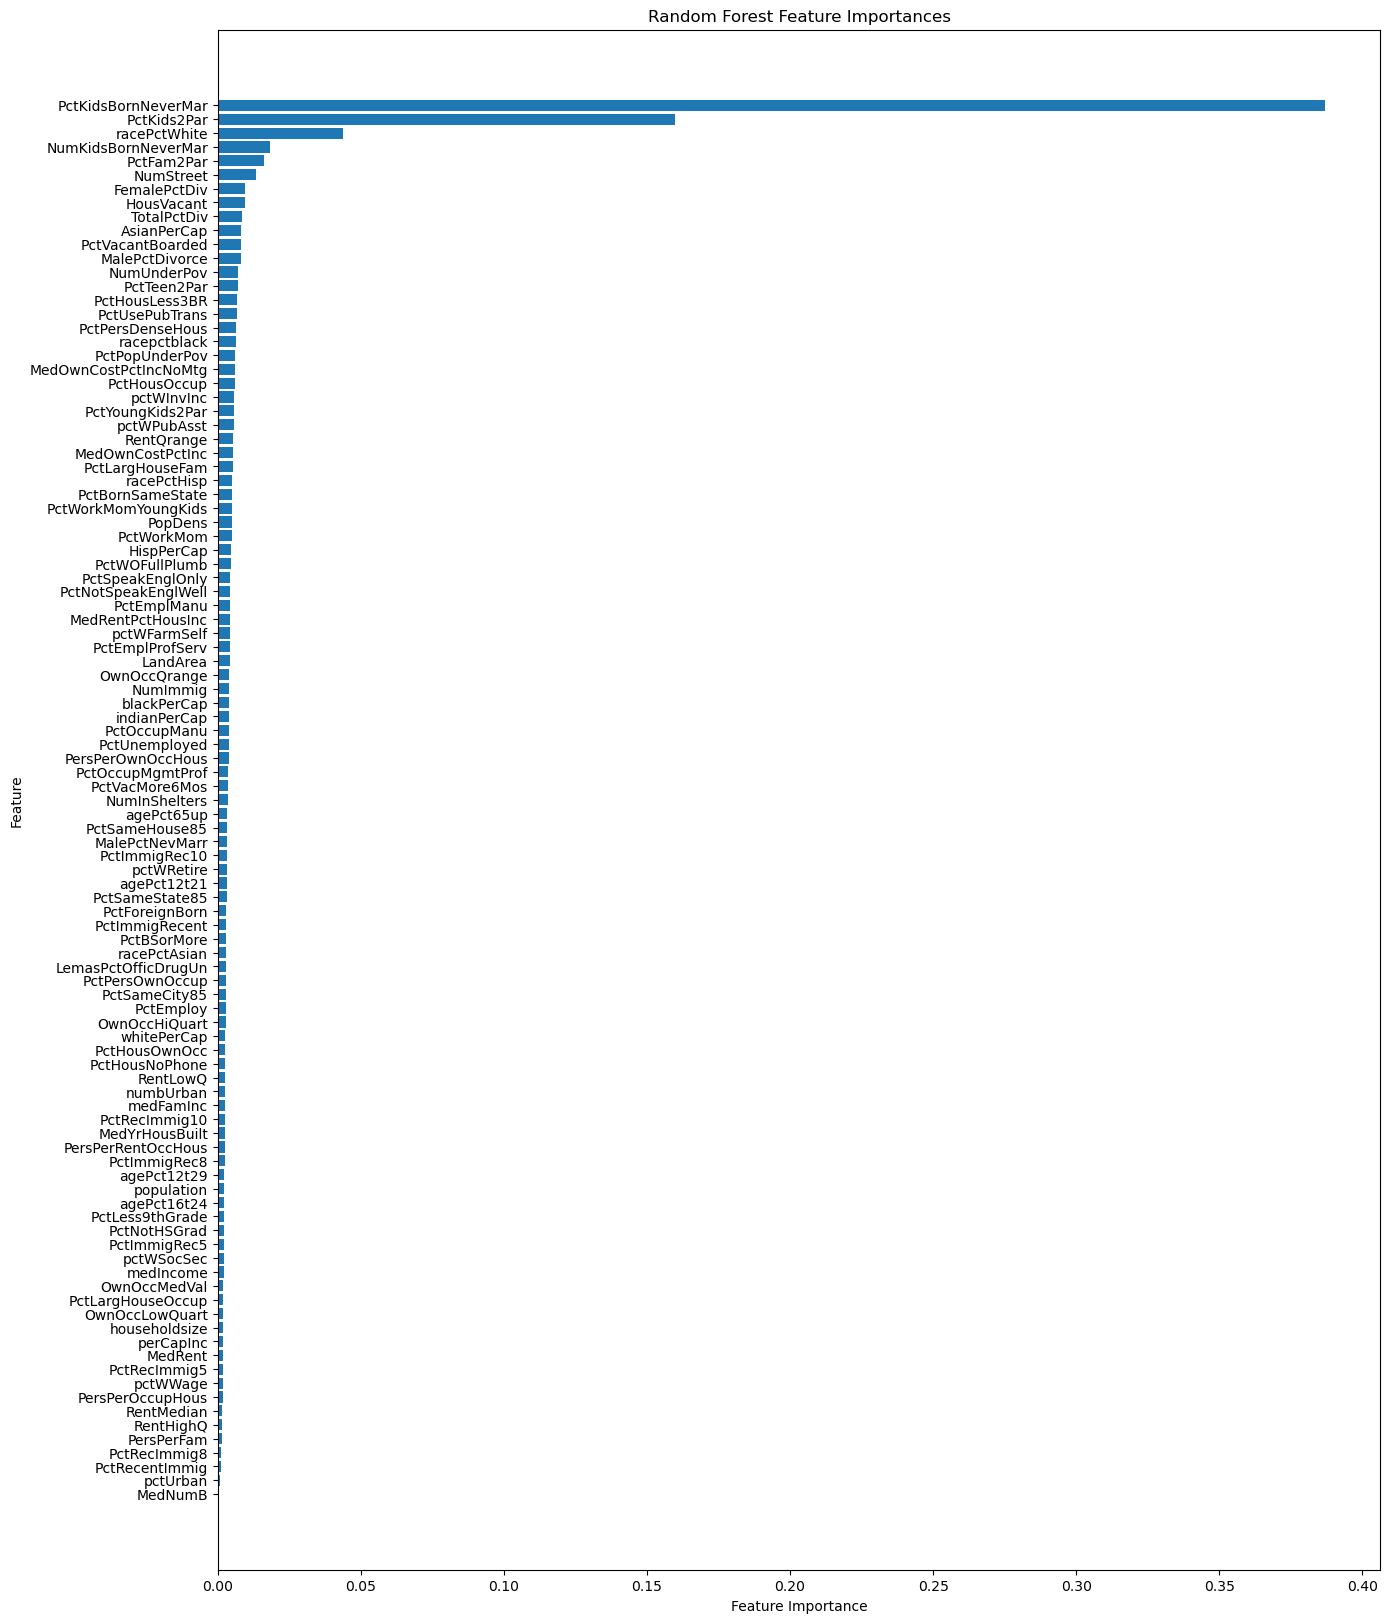

In [15]:
import matplotlib.pyplot as plt

#'reg' is RandomForestRegressor and 'numerical_features' is the list of feature names

# Get feature importances
sorted_idx = reg.feature_importances_.argsort()
features = numerical_features 
result = sorted(zip(features, reg.feature_importances_), key=lambda x: x[1], reverse=False)

# Increase figure size
plt.figure(figsize=(15, 20))  # Adjust the width and height as needed

# Create horizontal bar plot
plt.barh([x[0] for x in result], [x[1] for x in result])

# Set labels and title
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')

# Show the plot
plt.show()


## Neural Networks

In [16]:
from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.optim as optim

# Preprocess training data
X_train_transformed = mapper.fit_transform(X_train)

# Hyperparameters
num_epochs = 50
learning_rate = 0.01
hidden_size = 32
batch_size = 50
input_dim = X_train_transformed.shape[1]
batch_no = X_train_transformed.shape[0] // batch_size

# Model definition
model = nn.Sequential(
    nn.Linear(input_dim, hidden_size),
    nn.Linear(hidden_size, 1)
)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        x_batch = Variable(torch.FloatTensor(X_train_transformed.values[start:end]))
        y_batch = Variable(torch.FloatTensor(Y_train[start:end]))
        optimizer.zero_grad()
        y_preds = model(x_batch)
        loss = criterion(y_preds, torch.unsqueeze(y_batch, dim=1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if epoch % 10 == 0: 
        print("Epoch {}, Loss: {}".format(epoch, running_loss))

# Preprocess test data
X_test_transformed = mapper.transform(X_test)

# Make predictions on test data
y_pred_test = model(torch.from_numpy(X_test_transformed.values).float()).flatten().detach().numpy()
test_mae = mean_absolute_error(Y_test, y_pred_test)

# Make predictions on training data
X_train_transformed = mapper.transform(X_train)
y_pred_train = model(torch.from_numpy(X_train_transformed.values).float()).flatten().detach().numpy()
train_mae = mean_absolute_error(Y_train, y_pred_train)

# Print MAE
print(f"Train Mean Absolute Error = {round(mae_train_data, 3)}, Test Mean Absolute Error = {round(mae_test_data, 3)} ")

Epoch 0, Loss: 24714125.75
Epoch 10, Loss: 8123064.421875
Epoch 20, Loss: 4611086.41015625
Epoch 30, Loss: 4554144.28515625
Epoch 40, Loss: 4524597.921875
Train Mean Absolute Error = 237.794, Test Mean Absolute Error = 246.592 


## Use AutoML to find the Best Machine Learning Algorithm

In [17]:
import h2o
from h2o.automl import H2OAutoML

# Start H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "20.0.2" 2023-07-18; Java(TM) SE Runtime Environment (build 20.0.2+9-78); Java HotSpot(TM) 64-Bit Server VM (build 20.0.2+9-78, mixed mode, sharing)
  Starting server from /Users/aadit/anaconda3/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/5_/3h66n0vj5r97wb1lxpq1pv3h0000gn/T/tmp4mviwakv
  JVM stdout: /var/folders/5_/3h66n0vj5r97wb1lxpq1pv3h0000gn/T/tmp4mviwakv/h2o_aadit_started_from_python.out
  JVM stderr: /var/folders/5_/3h66n0vj5r97wb1lxpq1pv3h0000gn/T/tmp4mviwakv/h2o_aadit_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,1 month and 17 days
H2O_cluster_name:,H2O_from_python_aadit_pquxhr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.981 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"


In [18]:
X_train_df = pd.DataFrame(X_train, columns=X_train.columns)
Y_train_df = pd.DataFrame(Y_train, columns=['target'])  # Replace 'target' with your actual target variable name

# Concatenate X_train_df and Y_train_df along columns
train_data = pd.concat([X_train_df, Y_train_df], axis=1)

# Convert the concatenated DataFrame to an H2OFrame
h2o_train = h2o.H2OFrame(train_data)

# Identify features and target variable
x = list(X_train_df.columns)  # List of feature names
y = 'target'  # Replace 'target' with your actual target variable name

# Split the data into training and validation sets
train, valid = h2o_train.split_frame(ratios=[0.8], seed=42)

# Run H2O AutoML
aml = H2OAutoML(max_models=10, seed=42, nfolds=5)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb)

# Get the best model from AutoML
best_model = aml.leader
print("The Best Model is" + str(best_model))


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
21:52:00.80: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
21:52:00.86: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                    rmse     mse      mae      rmsle    mean_residual_deviance
GLM_1_AutoML_1_20231203_215200                           615.444  378771  443.583    1.20568                    378771
StackedEnsemble_AllModels_1_AutoML_1_20231203_215200     615.475  378810  443.592    1.20513                    378810
StackedEnsemble_BestOfFamily_1_AutoML_1_20231203_215200  615.52   378865  443.145    1.20502                    378865
G

## Challenges in Model-Agnostic Feature Importance Interpretation

### Problem Statement:
- Defining feature importance in a way that is consistent across various machine learning models poses a significant challenge.
- Different models utilize distinct methods (e.g., impurity reduction, coefficients), complicating the establishment of a universal standard for feature importance.

### Addressing the Need for Individual Prediction Understanding: Shap Values
- To gain insights into why a model produces a specific prediction for a given instance, Shap values come into play.
- SHAP (SHapley Additive exPlanations) values provide a comprehensive explanation of model predictions by attributing the contribution of each feature.
- These values leverage cooperative game theory to ensure a fair distribution of importance among features.


## Visualizing Model Behavior: Partial Dependency Plots and Shap Values



### Shap Values:
- Shap values play a crucial role in generating insights into individual predictions.
- They assign a quantifiable contribution to each feature for every sample in the dataset.
- By employing cooperative game theory principles, Shap values ensure a fair distribution of importance among features.
- PDPs often leverage Shap values to enhance the interpretability of individual feature effects on predictions.

### Partial Dependency Plots (PDP):
- Partial Dependency Plots provide a rapid method for visualizing the relationship between a feature and the predicted outcome.
- These plots showcase the effect of a single variable on the model's prediction while keeping other variables constant.
- Efficient for understanding how changes in a specific feature impact the overall model prediction.

In [19]:
shap_explainer = shap.Explainer(pipeline.predict, X_train)
shap_values_test = shap_explainer(X_test)

def visualize_partial_dependence(feature, sample_index=None):
    if sample_index is None:
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True)
    else:
        shap.partial_dependence_plot(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True,
            shap_values=shap_values_test[sample_index:sample_index + 1, :])

PermutationExplainer explainer: 201it [01:38,  1.86it/s]                        


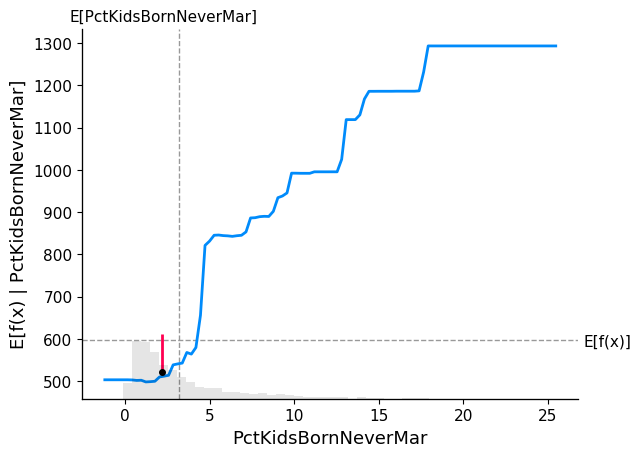

In [20]:
visualize_partial_dependence('PctKidsBornNeverMar', 0)


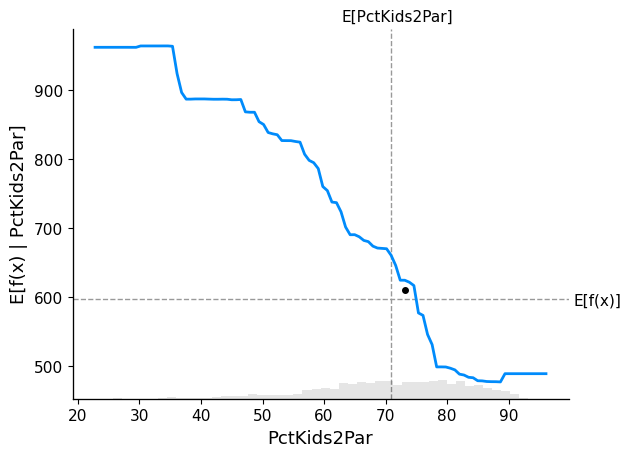

In [21]:
visualize_partial_dependence('PctKids2Par', 0)


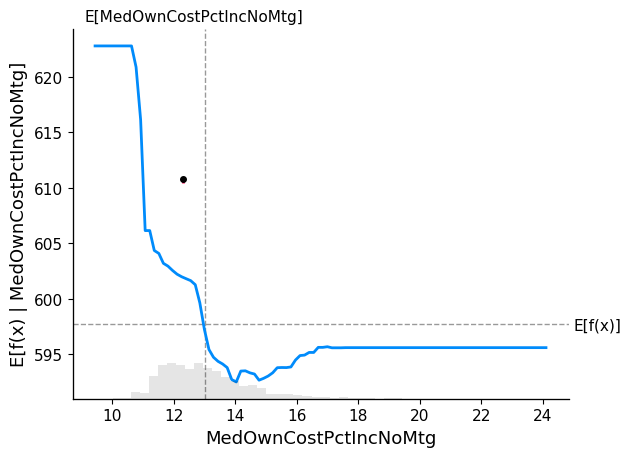

In [22]:
visualize_partial_dependence('MedOwnCostPctIncNoMtg', 0)


In [23]:
# Initialize JavaScript for SHAP plots

shap.initjs()

In [24]:
def visualize_feature_importance(sample_idx, plot_type='condensed'):
    if plot_type == 'condensed':
        return shap.plots.force(shap_values_test[sample_idx])
    elif plot_type == 'waterfall':
        return shap.plots.waterfall(shap_values_test[sample_idx])
    else:
        return "Return a valid visual ('condensed', 'waterfall')"

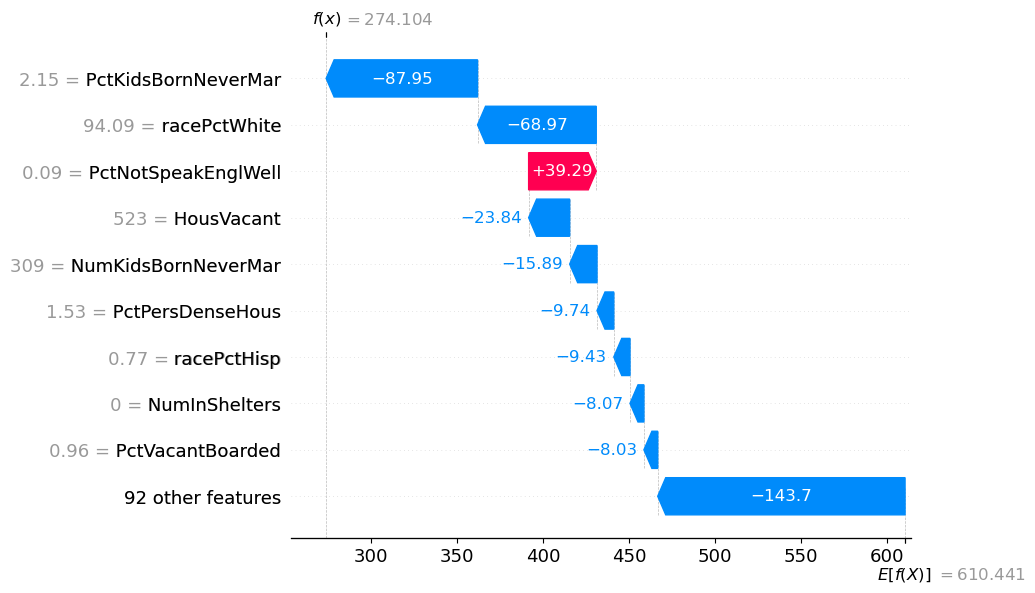

In [25]:
visualize_feature_importance(0, 'waterfall')


In [26]:
visualize_feature_importance(0, 'condensed')


## Feature Importance for model

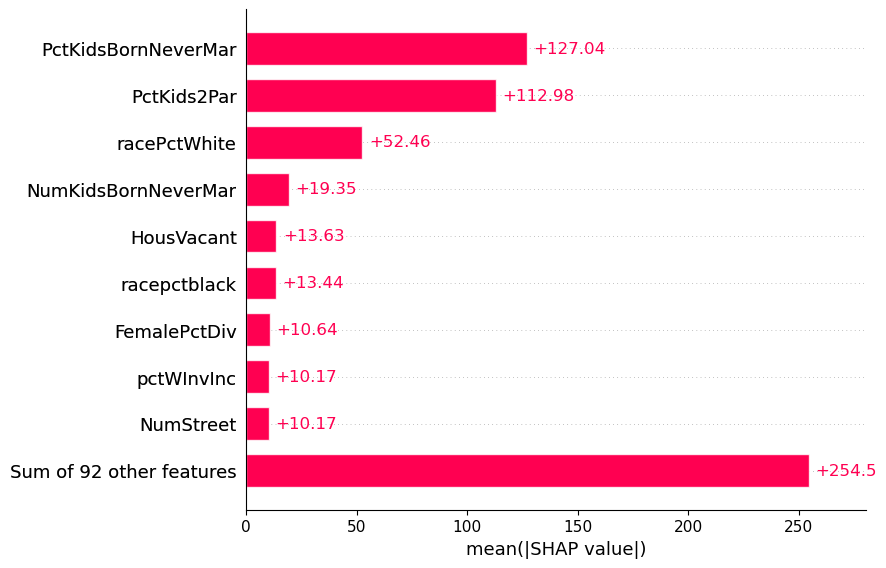

In [27]:
shap.plots.bar(shap_values_test)


### Two Most Important Features According to Linear Regression Model

1. **NumKidsBornNeverMar:**  Represents the number of kids born to never-married individuals.

2. **PCTKids2Par:** Indicates the percentage of kids in two-parent households.


Interpreting Neural Network in the same way - 


In [28]:
# Preprocess the training data
transformed_X_train = mapper.fit_transform(X_train)

# Model training parameters
num_epochs = 50
learning_rate = 0.01
hidden_size = 32
batch_size = 50
input_dim = transformed_X_train.shape[1]
batch_no = transformed_X_train.shape[0] // batch_size

# Define the neural network model
neural_model = nn.Sequential(
    nn.Linear(input_dim, hidden_size),
    nn.Linear(hidden_size, 1)
)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(neural_model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        x_batch = Variable(torch.FloatTensor(transformed_X_train.values[start:end]))
        y_batch = Variable(torch.FloatTensor(Y_train[start:end]))
        optimizer.zero_grad()
        y_preds = neural_model(x_batch)
        loss = criterion(y_preds, torch.unsqueeze(y_batch, dim=1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if epoch % 10 == 0:
        print("Epoch {}, Loss: {}".format(epoch, running_loss))

# Preprocess the test data
transformed_X_test = mapper.transform(X_test)

# Make predictions on the test set
y_pred = neural_model(torch.from_numpy(transformed_X_test.values).float()).flatten().detach().numpy()

# Evaluate model performance
test_mae = mean_absolute_error(Y_test, y_pred)
transformed_X_train = mapper.transform(X_train)
y_pred_train = neural_model(torch.from_numpy(transformed_X_train.values).float()).flatten().detach().numpy()
train_mae = mean_absolute_error(Y_train, y_pred_train)

# Print MAE values
print(f"Train Mean Absolute Error = {round(mae_train_data, 3)}, Test Mean Absolute Error = {round(mae_test_data, 3)} ")


Epoch 0, Loss: 24724982.78125
Epoch 10, Loss: 8098934.28125
Epoch 20, Loss: 4611383.62890625
Epoch 30, Loss: 4553391.58203125
Epoch 40, Loss: 4523283.984375
Train Mean Absolute Error = 237.794, Test Mean Absolute Error = 246.592 


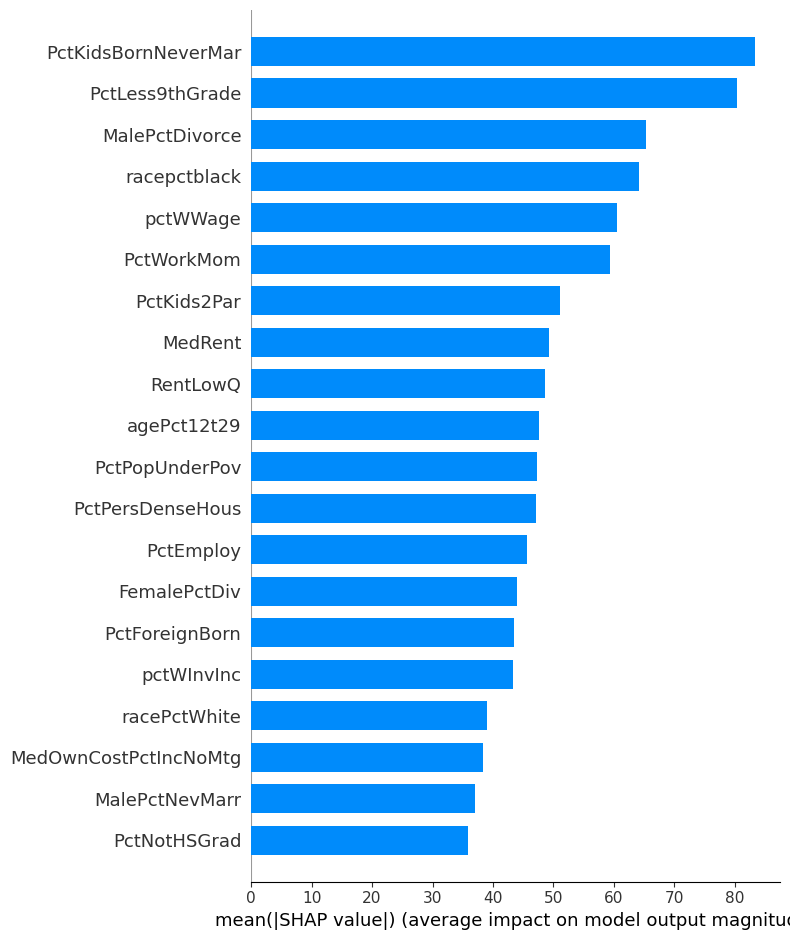

In [29]:
interpreter = shap.DeepExplainer(neural_model, torch.from_numpy(transformed_X_train.values).float())
shap_values = interpreter.shap_values(torch.from_numpy(transformed_X_test.values).float())
shap.summary_plot(shap_values, X_test, plot_type='bar')


### Two Most Important Features According to Neural Network Model

1. **PCTKidsBornNeverMar:** 
    - This feature represents the percentage of kids born to mothers who were never married.
2. **PCTLess9thGrade:**
    - This feature indicates the percentage of the population with less than a 9th-grade education.


In [33]:
interpreter = shap.DeepExplainer(best_model, torch.from_numpy(transformed_X_train.values).float())
shap_values = interpreter.shap_values(torch.from_numpy(transformed_X_test.values).float())
shap.summary_plot(shap_values, X_test, plot_type='bar')


AssertionError: <class 'h2o.estimators.glm.H2OGeneralizedLinearEstimator'> is not currently a supported model type!

**The best model is not supported for analysis by Shap as can be seen by "AssertionError: <class 'h2o.estimators.glm.H2OGeneralizedLinearEstimator'> is not currently a supported model type!"**

## References -

1. SKLearn Random Forrest Regressor -  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
2. Shap Dataset - https://shap.readthedocs.io/en/latest/generated/shap.datasets.california.html#shap.datasets.california
3. H20AutoML - https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
4. Reference Notebook - https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb
5. SK Learn Pandas - https://github.com/scikit-learn-contrib/sklearn-pandas